# Pandas DataReader

Note that even though this lesson is optional, you may want to review it, as it may be used in a CodeAlong during class. 

## Learning Objectives:

- Use Pandas DataReader to download financial time series data
- Apply a workaround for the yahoo finance API

## What is Pandas DataReader?
Pandas DataReader is a Python package that allows us to access data sources from the internet and automatically create dataframes with the information. It is commonly used with financial data. Some common sources include:

- Yahoo Finance
- Google Finance
- World Bank

Each source uses a slightly different format. The lesson below with demonstrate how to access data from Yahoo Finance. We will first define a start and end date. We will use Jan 1, 2001 as our start date and today's date as our end date. Note that the end date will vary depending on today's date.

In [1]:
import datetime as dt
##  saving today as string for pandas DataReader
today = dt.datetime.now().strftime("%Y-%m-%d")
today

'2023-02-02'

In [2]:
start_date = '2001-01-01'
end_date = today

In [4]:
##  Pandas DataReader Import
import pandas_datareader as pdr
##  Get MSFT stock price for 2012-2020 from Yahoo Finance
msft = pdr.DataReader('MSFT','yahoo',start_date, end_date)
msft

TypeError: string indices must be integers

## Troubleshooting
Pandas DataReader occasionally has issues connecting to the yahoo finance API. This is not due to a problem with your computer/environment. The yahoo API is one of the only free-to-use data sources included in Panda's DataReader, so we need to use a workaround to get Yahoo finance working correctly.

- Install the finance package (you only need to do this once)
    - Note: if you install the package in your notebook, you should comment out the pip install command after you have successfully installed the package.

In [5]:
# in a notebook, use ! before a pip command 
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 629.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 721.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [6]:
# Import the package and run the pdr_override function
import yfinance as yfin
yfin.pdr_override()

In [7]:
# Then, change your import statement for pandas_datareader ( add ".data" to the import)
import pandas_datareader.data as pdr

In [8]:
# Finally, use the pdr.get_data_yahoo function instead of the pdf.DataReader 
# function. Note that we no longer need to include "yahoo" as an argument 
# since this function is already specifically for yahoo.
msft = pdr.get_data_yahoo('MSFT',start_date, end_date)
msft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02 00:00:00-05:00,22.062500,22.500000,21.437500,21.687500,13.564679,82413200
2001-01-03 00:00:00-05:00,21.593750,24.437500,21.562500,23.968750,14.991518,135962200
2001-01-04 00:00:00-05:00,23.906250,25.250000,23.437500,24.218750,15.147877,112397000
2001-01-05 00:00:00-05:00,24.250000,24.937500,23.781250,24.562500,15.362879,93414600
2001-01-08 00:00:00-05:00,24.468750,24.875000,23.343750,24.468750,15.304253,79817600
...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,243.649994,248.309998,242.000000,248.000000,248.000000,33454500
2023-01-27 00:00:00-05:00,248.990005,249.830002,246.830002,248.160004,248.160004,26480800
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,242.710007,25867400


This issue reappeared in early January of 2023, so we will adjust the code below this point to use the new workaround function, instead of the default function.

## To recap, the workaround involves:

- installing an additional package.
- running an override function
- and then using the pandas_datareader.data.get_data_yahoo function instead of pandas_datareader.DataReader

In [9]:
# !pip install yfinance
import yfinance as yfin
yfin.pdr_override()
##  Pandas DataReader Import
import pandas_datareader.data as pdr
# example use with new function
msft = pdr.get_data_yahoo('MSFT',start_date, end_date)

[*********************100%***********************]  1 of 1 completed


## Back to Our Example
Now we will extract information from Google Stocks (GOOGL).

In [10]:
##  Get GOOGL price for 2012-2020 from Yahoo Finance
googl = pdr.get_data_yahoo('GOOGL',start_date, end_date)
googl 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,96.500000,97.570000,95.379997,97.519997,97.519997,30114000
2023-01-27 00:00:00-05:00,97.309998,100.320000,97.309998,99.370003,99.370003,33850200
2023-01-30 00:00:00-05:00,97.480003,98.290001,96.400002,96.940002,96.940002,27226200


In [11]:
# Finally, we will obtain data on Apple stocks (AAPL):

##  Get AAPL stock price for 2012-2020 from Yahoo Finance
apple = pdr.get_data_yahoo('AAPL',start_date, end_date)
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02 00:00:00-05:00,0.265625,0.272321,0.260045,0.265625,0.226424,452312000
2001-01-03 00:00:00-05:00,0.258929,0.297991,0.257813,0.292411,0.249256,817073600
2001-01-04 00:00:00-05:00,0.323940,0.330357,0.300223,0.304688,0.259722,739396000
2001-01-05 00:00:00-05:00,0.302455,0.310268,0.286830,0.292411,0.249256,412356000
2001-01-08 00:00:00-05:00,0.302455,0.303292,0.284598,0.295759,0.252110,373699200
...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,145.929993,70492800
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,143.000000,64015300


In [13]:
import pandas as pd


In [14]:
stocks_df = pd.DataFrame({"AAPL": apple['Adj Close'],
             "MSFT": msft['Adj Close'],
             'GOOGL': googl['Adj Close']})
stocks_df

,AAPL,MSFT,GOOGL
Date,,,
2001-01-02 00:00:00-05:00,0.226424,13.564681,NaN
2001-01-03 00:00:00-05:00,0.249256,14.991514,NaN
2001-01-04 00:00:00-05:00,0.259722,15.147892,NaN
2001-01-05 00:00:00-05:00,0.249256,15.362878,NaN
2001-01-08 00:00:00-05:00,0.252110,15.304251,NaN
...,...,...,...
2023-01-26 00:00:00-05:00,143.960007,248.000000,97.519997
2023-01-27 00:00:00-05:00,145.929993,248.160004,99.370003
2023-01-30 00:00:00-05:00,143.000000,242.710007,96.940002


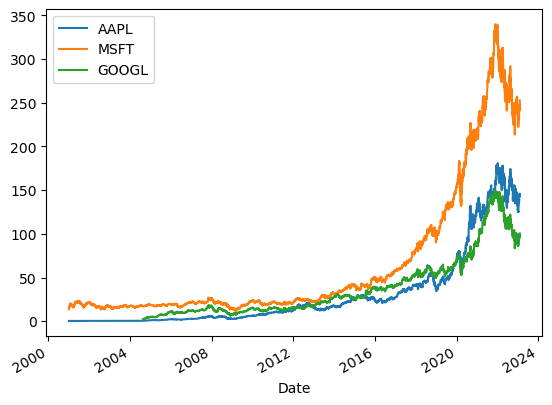

In [15]:
stocks_df.plot();


In [23]:
#Downloading Crypto Currencies
#Let's take a look at some crypto values:
bitcoin= pdr.get_data_yahoo('BTC-USD',start_date,end_date);
etherium =  pdr.get_data_yahoo('ETH-USD',start_date,end_date);
crypto_df = pd.DataFrame({'BTC':bitcoin['Adj Close'],
                         'Eth':etherium['Adj Close']})
crypto_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC,Eth
Date,,
2014-09-17 00:00:00+00:00,457.334015,NaN
2014-09-18 00:00:00+00:00,424.440002,NaN
2014-09-19 00:00:00+00:00,394.795990,NaN
2014-09-20 00:00:00+00:00,408.903992,NaN
2014-09-21 00:00:00+00:00,398.821014,NaN
...,...,...
2023-01-28 00:00:00+00:00,23031.089844,1572.435059
2023-01-29 00:00:00+00:00,23774.566406,1646.155640
2023-01-30 00:00:00+00:00,22840.138672,1567.326538


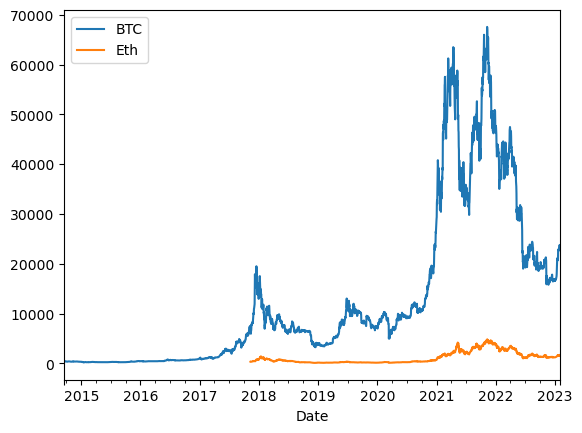

In [24]:
crypto_df.plot();


## Summary
This lesson introduced you to Pandas DataReader. Specifically, we extracted stock data from Yahoo finance.

## Additional Resources
Pandas- DataReader Coumentation Relaease 0.10.0
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://buildmedia.readthedocs.org/media/pdf/pandas-datareader/latest/pandas-datareader.pdf
How to fetch stock Data using Pandas DataReader in Python
https://dev.to/shahstavan/how-to-fetch-stock-data-using-api-in-python-5e15
Stock Market Analysis with Pandas DataReader and Plotly for Beginners
https://dev.to/shahstavan/how-to-fetch-stock-data-using-api-in-python-5e15
